In [1]:
W = WeylGroup("B3", prefix="s")
[s1,s2,s3] = W.simple_reflections()

##################################################################################

n = rank(W)
w0 = W.long_element()
e = W(1)


####### Kazhdan-Lusztig polynomials ##########################

# A faster implementation of KL-polynomials (using the optional package Coxeter 3) is given by this
# Fokko Ducloux’s Coxeter3 C++ library.

# Had to install it: I just typed "sage -i coxeter3" in the terminal.

# It seems that one can direcly coerce from WeylGroup to CoxeterGroup and vice versa.
# I will therefore use CoxeterGroup to calculate KL-polynomials, but for all other Bruhat business I will use WeylGroup.

R.<q> = LaurentPolynomialRing(QQ)

KL = KazhdanLusztigPolynomial(W,q)  # KL-polynomials implemented in standard Sage way
# http://doc.sagemath.org/html/en/reference/combinat/sage/combinat/kazhdan_lusztig.html


CoxeterPackage = CoxeterGroup(W, implementation="coxeter3")

def KLP(x,y):
    '''Returns the KL-polynomial, implemented in "Coxeter3" package by Fokko du Cloux.
    http://math.univ-lyon1.fr/~ducloux/coxeter/coxeter3/english/coxeter3_e.html'''
    
    if x not in W:
        x = convert_from_123(x)
    if y not in W:
        y = convert_from_123(y)
    
    return CoxeterPackage.kazhdan_lusztig_polynomial(CoxeterPackage(x), CoxeterPackage(y))
    # If "coxeter3" is not installed, remove the line 'CoxeterPackage = CoxeterGroup(W, implementation="coxeter3")'
    # and in this function return KL.P(x,y)

#Point:
#    - standard Sage way: KL.P(x,y)
#    - faster way: KLP(x,y) 


def mu(w,x):
    '''Returns the KL mu-function with arguments w,x.
    By Humphrey's BGG book p. 175 and p. 169, for w<x we have:
    mu(x,w) = mu(w0*w,w0*x),
    mu(w,x) = dim Exit^1 (L_w,L_x) = dim Exit^1(L_x,L_w) = dim Exit^1(Delta_x,L_w).'''

    if w not in W:
        w = convert_from_123(w)
    if x not in W:
        x = convert_from_123(x)
        
    if w.bruhat_le(x):
        poly_dict = KLP(w,x).dict()       
        j = (x.length()-w.length()-1)/2 
        if j not in poly_dict.keys():
            return 0
        return poly_dict[j]

    return 0


def convert_to_123(w):
    '''Converts an element from W to the "123" string notation.
    Does not work with coefficients, as "convert_to_123_long".'''
    
    if w == W(1):
        return "e"
    
    return str(w).replace("s","").replace("*","")


def convert_from_123(string):
    '''Converts one element from W in the "123" string notation to the usual "s1*s2*s3" notation.'''
    
    if type(string)== Integer:
        string = str(string)
        
    if string == "e":
        return W(1)
    
    string = "*".join([char for char in string])
    
    for i in range(1,n+1):
        string = string.replace(str(i),"s%s"%i)
    
    return eval(string)


def DR(w):
    '''Returns the set of simple right descents of w.'''
    
    return {W.simple_reflections()[i] for i in w.descents()}


def DL(w):
    '''Returns the set of simple left   descents of w.'''
        
    return DR(w.inverse())


def AL(w):
    '''Returns the set of simple left ascends of w.'''
    
    DescLe = list(DL(w))
    AscLe = [s for s in W.simple_reflections() if s not in DescLe]
    return set(AscLe)


def AR(w):
    '''Returns the set of simple right ascends of w.'''
    
    DescRi = list(DR(w))
    AscRi = [s for s in W.simple_reflections() if s not in DescRi]
    return set(AscRi)





W_poset = W.bruhat_poset()

def join(S):
    SS = [convert_from_123(a) for a in S if a not in W] + [a for a in S if a in W]
    
    U = set(W.bruhat_interval(SS[0],w0))
    for a in SS[1:]:
        U = U.intersection(set(W.bruhat_interval(a,w0)))
        
    minU = (W_poset.subposet(list(U))).minimal_elements()
    
    if len(minU)==1:
        j = minU[0]
        return eval(convert_to_123(str(j)))
    else:
        return minU

def JM(w):
    if w not in W:
        w = convert_from_123(w)
    result = W_poset.subposet([x for x in join_irreducibles if x.bruhat_le(w) ]).maximal_elements()
    return [convert_from_123(convert_to_123(x)) for x in result]

def BM(w):
    if w not in W:
        w = convert_from_123(w)
    return W_poset.subposet([x for x in bigrassmannians if x.bruhat_le(w) ]).maximal_elements()

def JM2(w):
    if w not in W:
        w = convert_from_123(w)
    DLw = DL(w)
    DRw = DR(w)
    result = []
    for x in JM(w):
        x = convert_from_123(convert_to_123(x))
        if list(DL(x))[0] in DLw and list(DR(x))[0] in DRw:
            result.append(x)
    return result

In [2]:
######################## B3 ########################

#sum_J KL = 19

#bigrassmannians = join_irreducibles = dissectors: 19

bigrassmannians = [s3, s3*s2, s3*s2*s1, s3*s2*s3, s3*s2*s3*s1*s2, s3*s2*s3*s1*s2*s3, s2, s2*s3, s2*s3*s2, s2*s3*s2*s1, s2*s1, s2*s3*s1*s2, s2*s3*s1*s2*s3, s2*s3*s1*s2*s3*s1*s2, s1, s1*s2, s1*s2*s3, s1*s2*s3*s2, s1*s2*s3*s2*s1]
join_irreducibles = [x for x in bigrassmannians]
dissectors = [x for x in join_irreducibles]

#

penultimate = [s3*s2*s3*s2,  s3*s2*s3*s2*s1,  s3*s2*s3*s1*s2*s1,  s3*s2*s3*s1*s2*s3*s1,  s3*s2*s3*s1*s2*s3*s1*s2,  s3*s1*s2*s3*s2,  s3*s1*s2*s3*s1*s2*s1,  s3*s2*s3*s1*s2*s3*s2*s1,  s3*s1*s2*s3*s2*s1,  s3*s2*s3*s1*s2*s3*s2,  s1*s2*s3*s1*s2*s1,  s2*s3*s1*s2*s3*s2*s1,  s2*s3*s1*s2*s3*s1*s2*s1,  s2*s3*s1*s2*s3*s2]

e : [], [] 


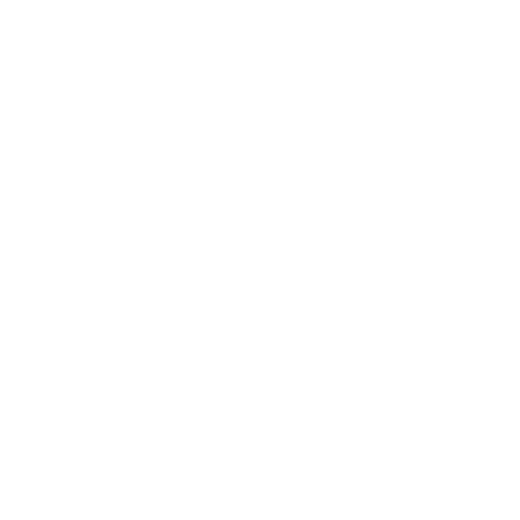

3 : [3], [3] 


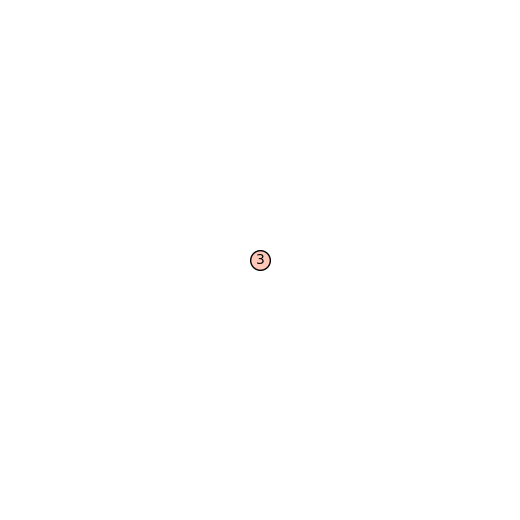

32 : [3], [2] 


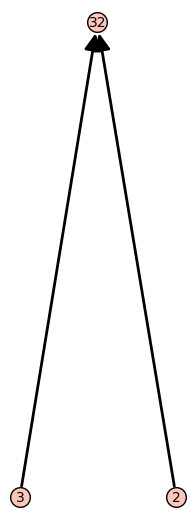

321 : [3], [1] 


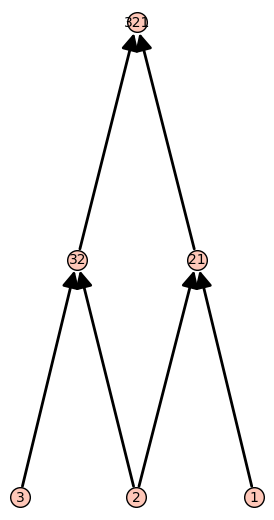

323 : [3], [3] 


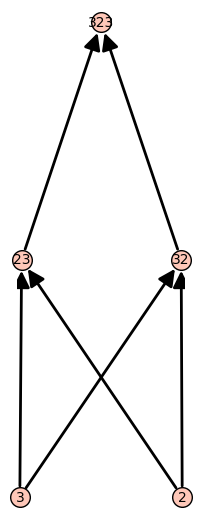

3231 : [3], [1, 3] 


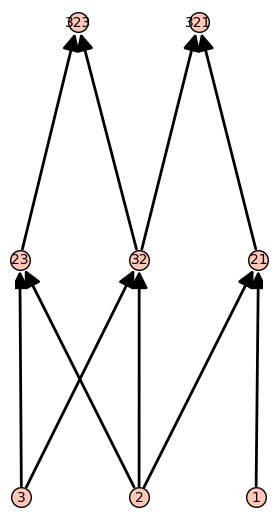

32312 : [3], [2] 


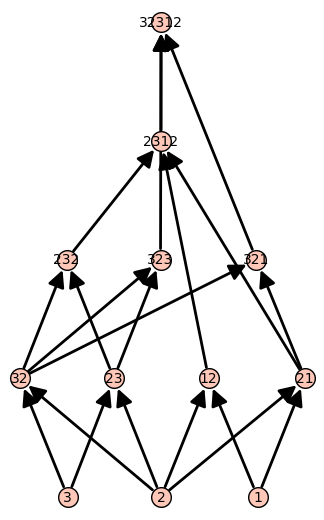

323123 : [3], [3] 


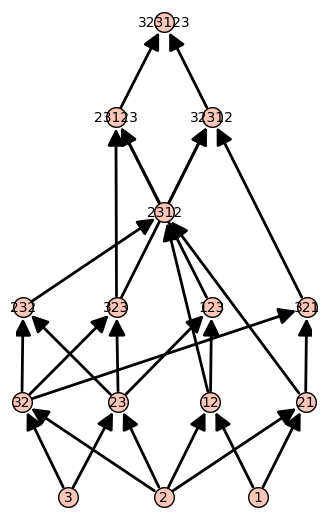

2 : [2], [2] 


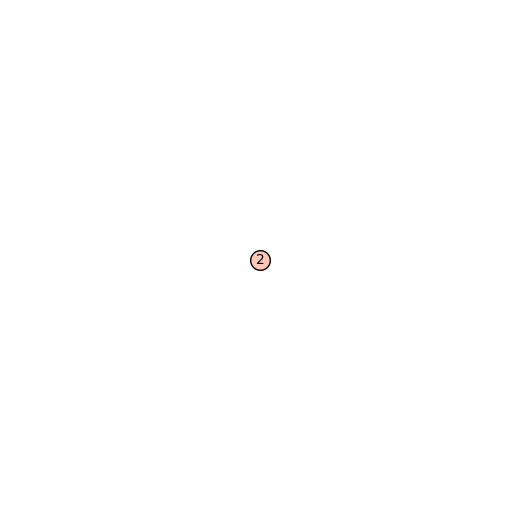

23 : [2], [3] 


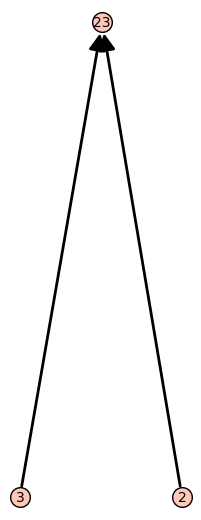

232 : [2], [2] 


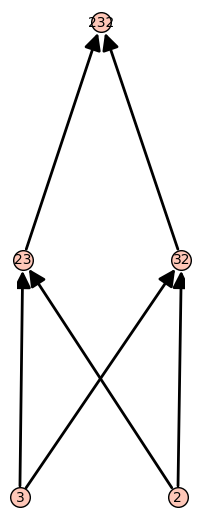

2321 : [2], [1] 


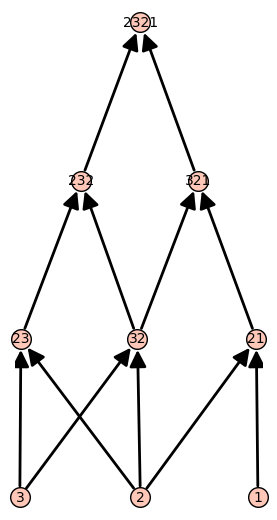

3232 : [3, 2], [3, 2] 


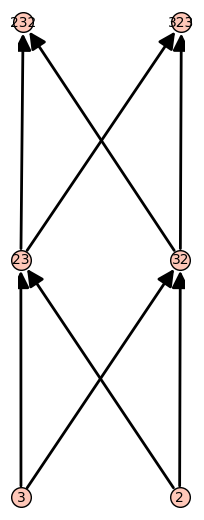

32321 : [3, 2], [1, 3] 


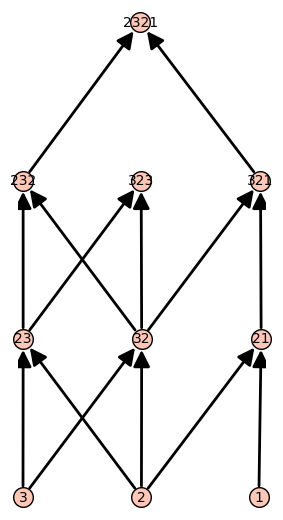

323121 : [3, 2], [1, 2] 


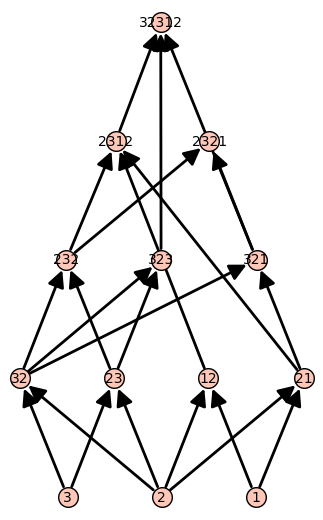

3231231 : [3, 2], [1, 3] 


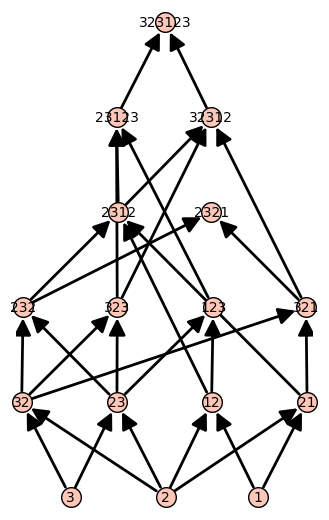

21 : [2], [1] 


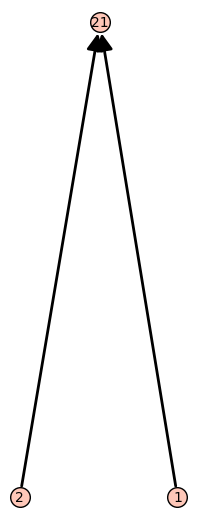

231 : [2], [1, 3] 


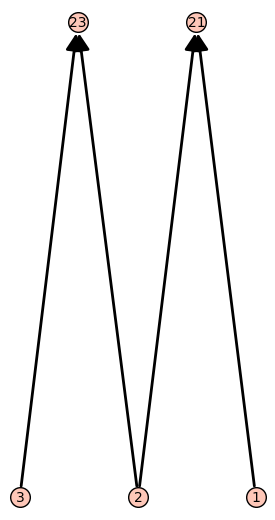

2312 : [2], [2] 


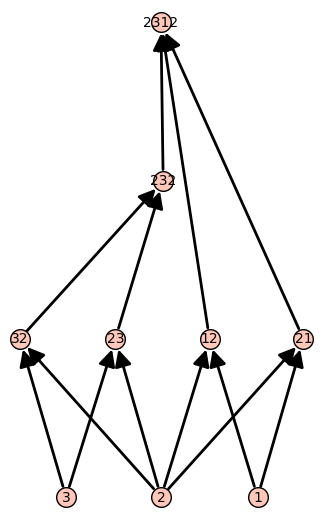

23121 : [2], [1, 2] 


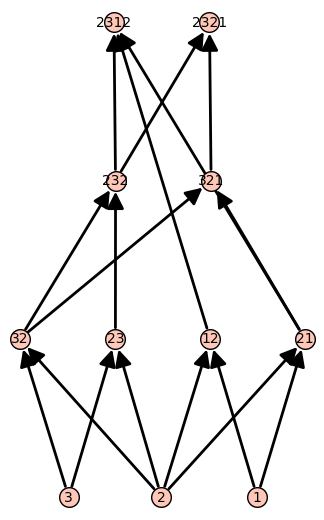

23123 : [2], [3] 


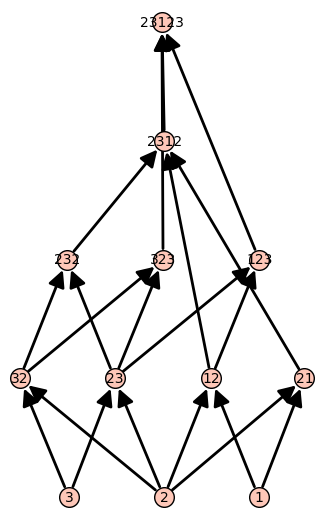

231231 : [2], [1, 3] 


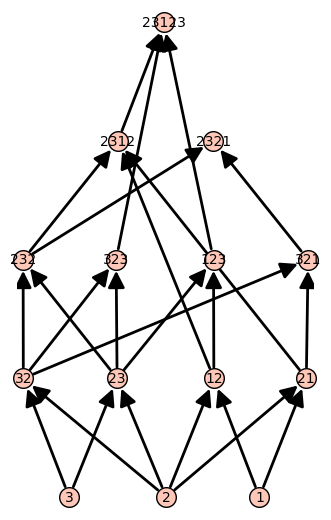

2312312 : [2], [2] 


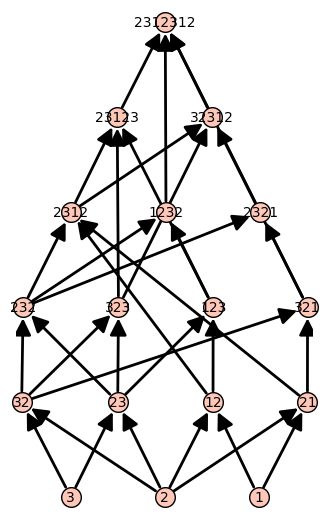

32312312 : [3, 2], [3, 2] 


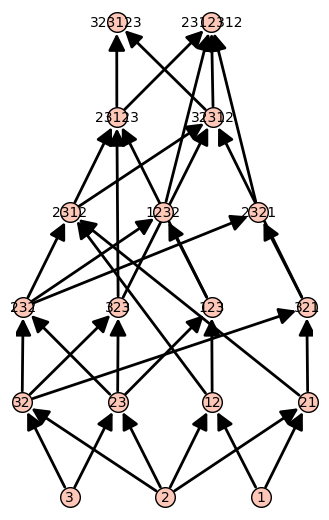

1 : [1], [1] 


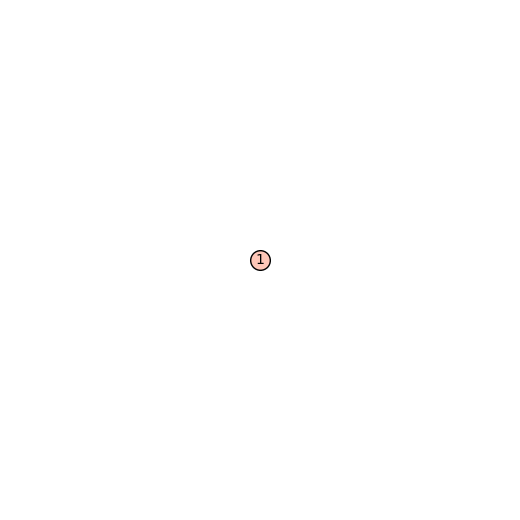

31 : [1, 3], [1, 3] 


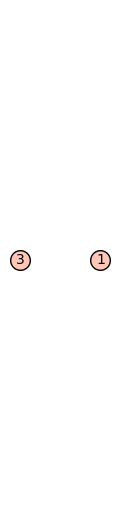

312 : [1, 3], [2] 


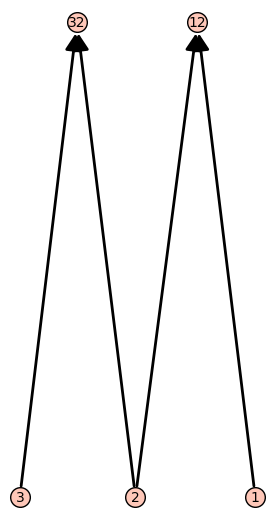

3121 : [1, 3], [1, 2] 


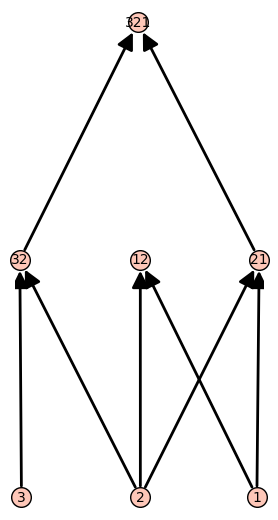

3123 : [1, 3], [3] 


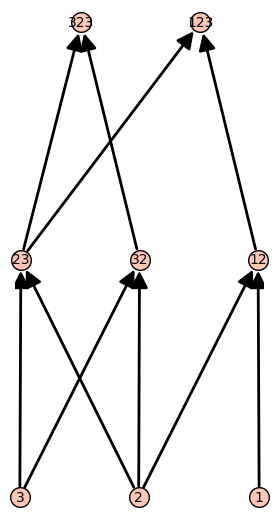

31231 : [1, 3], [1, 3] 


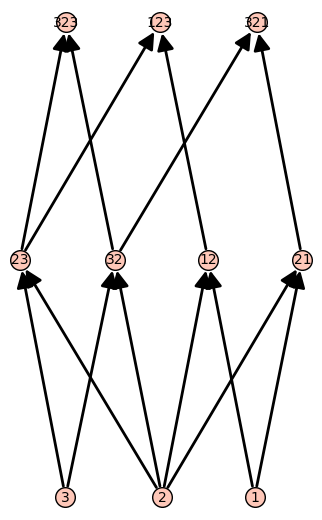

312312 : [1, 3], [2] 


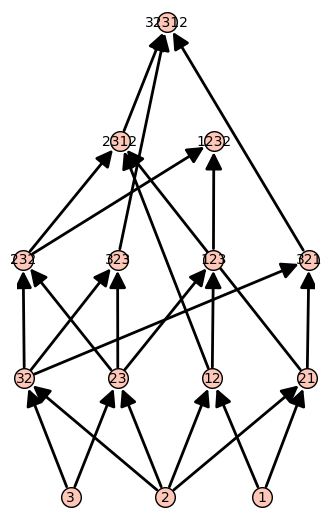

3231232 : [1, 3], [3, 2] 


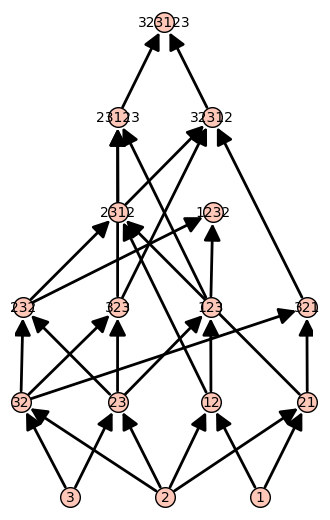

12 : [1], [2] 


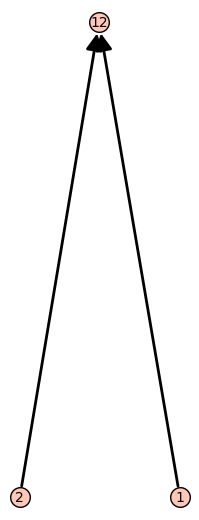

123 : [1], [3] 


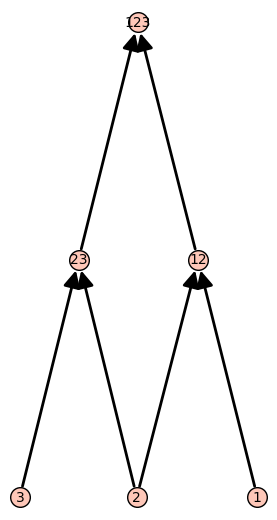

1232 : [1], [2] 


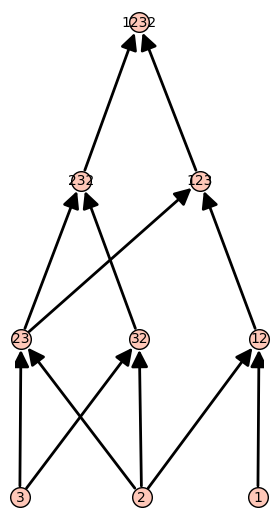

12321 : [1], [1] 


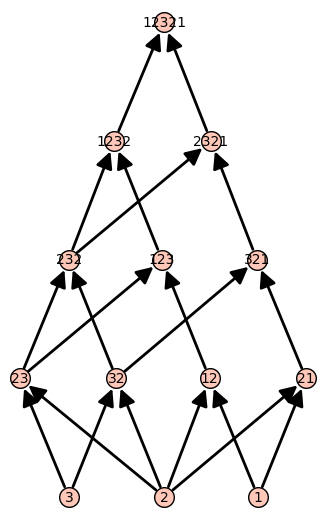

31232 : [1, 3], [3, 2] 


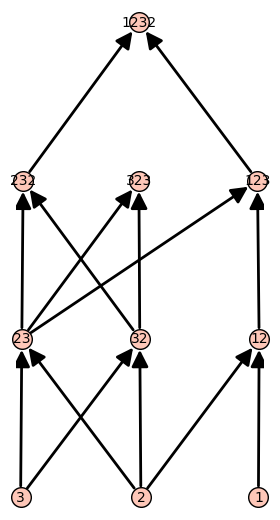

312321 : [1, 3], [1, 3] 


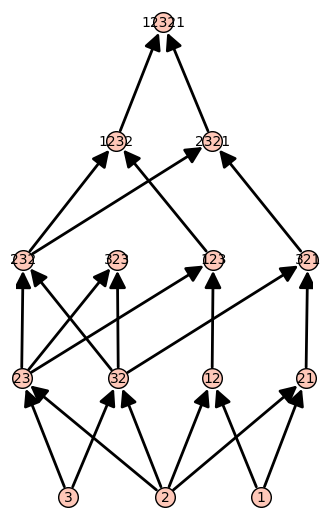

3123121 : [1, 3], [1, 2] 


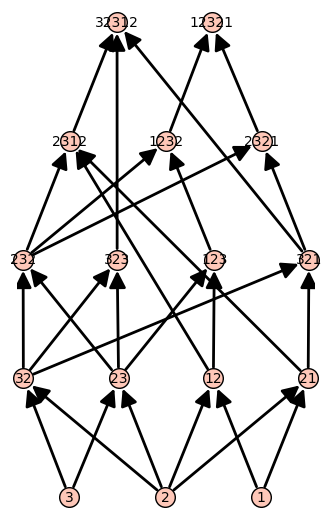

32312321 : [1, 3], [1, 3] 


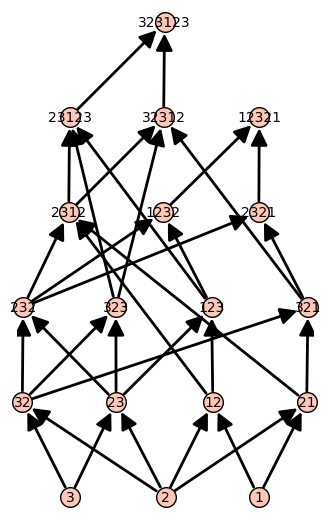

121 : [1, 2], [1, 2] 


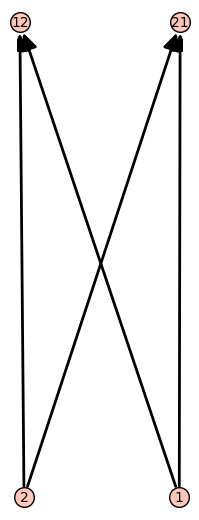

1231 : [1, 2], [1, 3] 


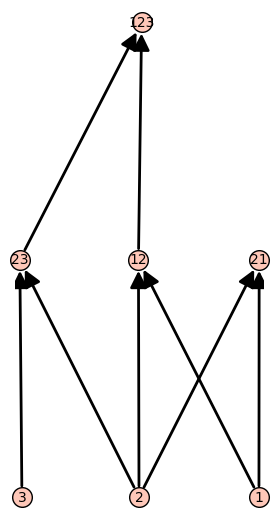

12312 : [1, 2], [2] 


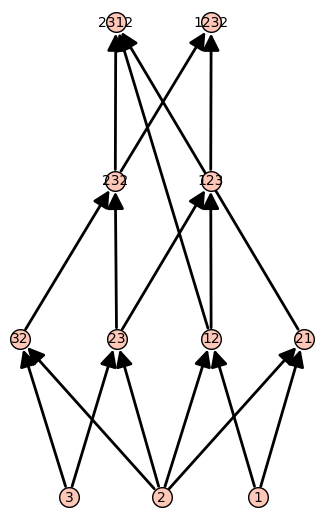

123121 : [1, 2], [1, 2] 


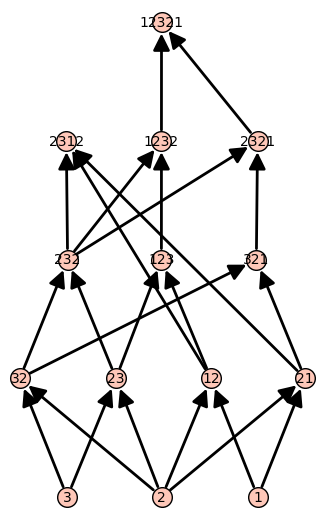

231232 : [1, 2], [3, 2] 


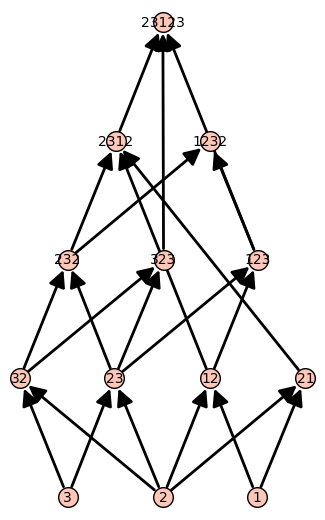

2312321 : [1, 2], [1, 3] 


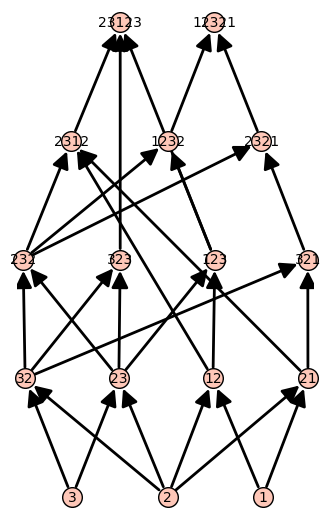

23123121 : [1, 2], [1, 2] 


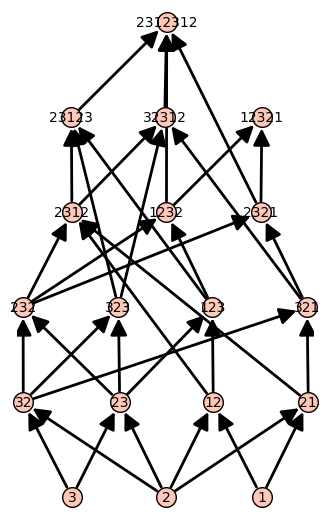

323123121 : [1, 3, 2], [1, 3, 2] 


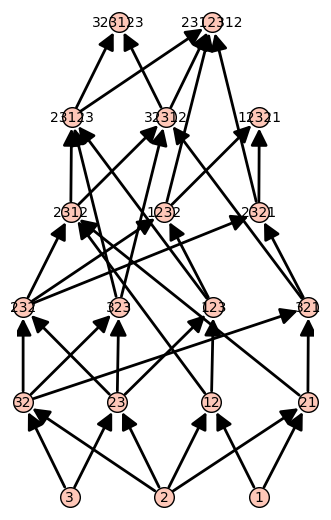

In [17]:
for w in W:
    print("%s : %s, %s "%(convert_to_123(w), [eval(convert_to_123(x)) for x in DL(w)], [eval(convert_to_123(x)) for x in DR(w)] ))
    
    show(W_poset.subposet([x for x in join_irreducibles if x.bruhat_le(w) ]).relabel(lambda x: convert_to_123(x)).plot(figsize = 8))

In [19]:
join(JM(3232))

3232